In [1]:
from src.data_generate_sde import sde_heston, time
from src.plotting import data_heatmap

import matplotlib.pyplot as plt
import jax.random as jr
import jax.numpy as jnp
import jax



In [2]:
t_start = 0.
T = 1.
x0 = (10, 0.25)
y = (12, 0.25)
N = 100
num_trajectories = 20


key =  jr.PRNGKey(1)
traj_keys = jax.random.split(key, num_trajectories)

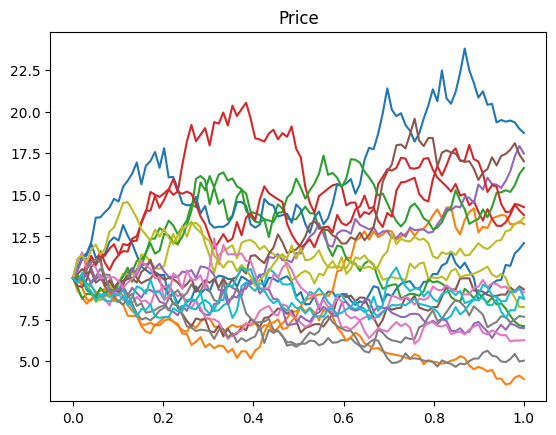

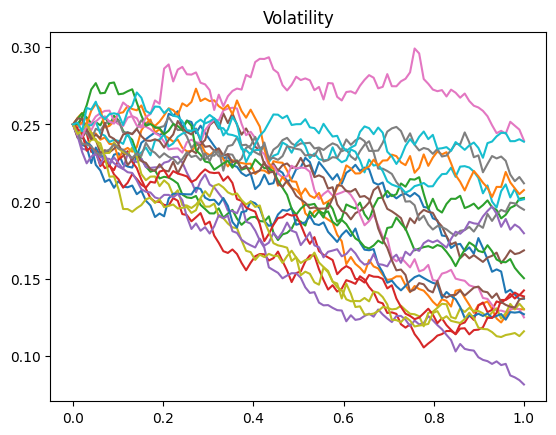

In [3]:
# Plot some forward trajectories

ts = time.grid(t_start=t_start, T=T, N=N)
trajectories = jax.vmap(sde_heston.forward, (0, None, None))(traj_keys, ts, x0)

stock_prices = trajectories[:, :, 0]
volatility = trajectories[:, :, 1]

for price in stock_prices:
    plt.plot(ts, price)
plt.title("Price")
plt.show()

for vol in volatility:
    plt.plot(ts, vol)
plt.title("Volatility")
plt.show()

(100000,)
(1000, 100)


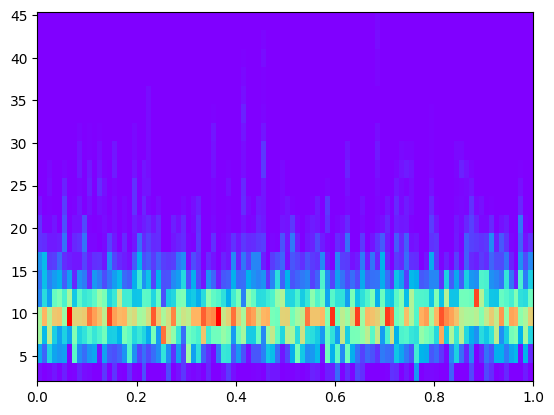

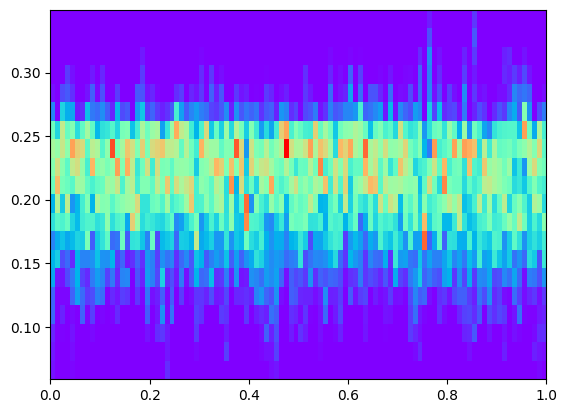

In [4]:
# Heatmap of forward trajectories

num_heatmap = 1000
heatmap_keys = jax.random.split(key, num_heatmap)

trajectories = jax.vmap(sde_heston.forward, (0, None, None))(heatmap_keys, ts, x0)

stock_prices = trajectories[:, :, 0]
volatility = trajectories[:, :, 1]

times = jnp.repeat(ts, num_heatmap, axis=0)
print(times.shape)
print(stock_prices.shape)

fig = data_heatmap(jnp.repeat(ts, num_heatmap, axis=0), stock_prices)
plt.show()

fig2 = data_heatmap(jnp.repeat(ts, num_heatmap, axis=0), volatility)
plt.show()




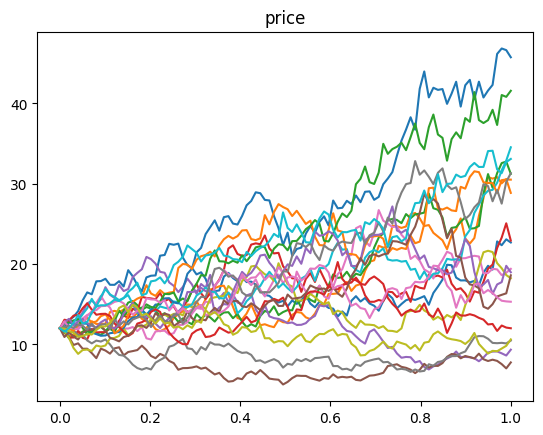

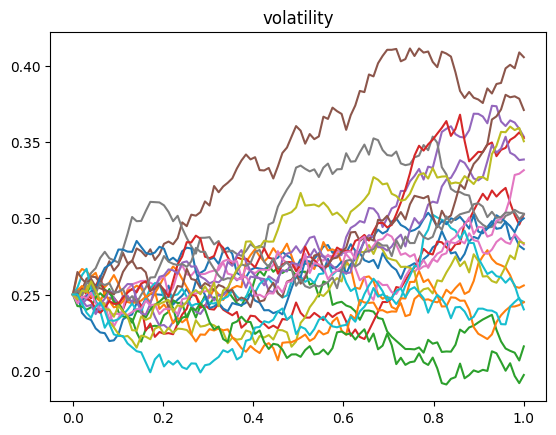

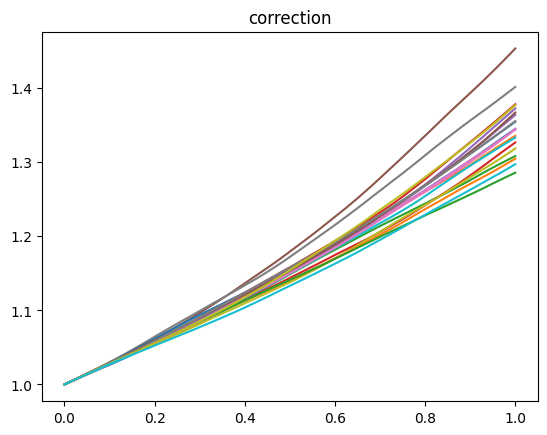

In [5]:
rev_keys = jax.random.split(key, num_trajectories)
rev_corr = jax.vmap(sde_heston.reverse_correction, (0, None, None))(traj_keys, ts, y)

rev_price = rev_corr[:, :, 0]
rev_vol = rev_corr[:, :, 1]
corr = rev_corr[:, :, 2]

for traj in rev_price:
    plt.plot(ts, traj)
plt.title("price")
plt.show()

for traj in rev_vol:
    plt.plot(ts, traj)
plt.title("volatility")
plt.show()

for traj in corr:
    plt.plot(ts, traj)
plt.title("correction")
plt.show()